In [1]:
#Solving the toth equation

#When working with files, it is always a good idea to import os, which allows you to be computer-agnostic
import os
#To create basic animations (by repeatedly changing a figure), these internal subroutines of iPython must be imported
from IPython.display import clear_output, display

#Any type of plot that involves matrices will end up needing NumPy
import numpy as np
#Import the plotting libraries of Matplotlib (the most commonly used routines)
import matplotlib.pyplot as plt
#This method will import everything associated with SciPy, but to use it, you must work within submodules
import scipy as scipy
#This method will allow you more direct access to the linear algebra routines of SciPy
from scipy import linalg as LA


In [10]:
#Setup all constants for boundary conditions, discretization
nx = 5
nz = 5
ngrid = nx*nz
xmin, xmax = 0, 500
zmin, zmax = 0, 300
dy = 1
K = 10

x0_head = 50
head_slope = 0.002


In [11]:
#Calculate grid spacing, grid centers, and grid boundaries

dx = (xmax-xmin)/nx
dz = (zmax-zmin)/nz
# Setup coordinates as iterated from left to right, top to bottom.
xc = np.linspace(xmin+(dx/2),xmax-(dx/2),nx)
zc = np.linspace(zmax-(dz/2),zmin+(dz/2),nz)
xgc,zgc = np.meshgrid(xc,zc)

xb = np.linspace(xmin,xmax,nx+1)
zb = np.linspace(zmax,zmin,nz+1)
xgb,zgb = np.meshgrid(xb,zb)

top_head = x0_head + head_slope*xc

i =  0 j =  0
i=0
i<>(nz-1)
j=0
j<>(nx-1)
i =  0 j =  1
i=0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  0 j =  2
i=0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  0 j =  3
i=0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  0 j =  4
i=0
i<>(nz-1)
j<>0
j=(nx-1)
i =  1 j =  0
i<>0
i<>(nz-1)
j=0
j<>(nx-1)
i =  1 j =  1
i<>0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  1 j =  2
i<>0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  1 j =  3
i<>0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  1 j =  4
i<>0
i<>(nz-1)
j<>0
j=(nx-1)
i =  2 j =  0
i<>0
i<>(nz-1)
j=0
j<>(nx-1)
i =  2 j =  1
i<>0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  2 j =  2
i<>0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  2 j =  3
i<>0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  2 j =  4
i<>0
i<>(nz-1)
j<>0
j=(nx-1)
i =  3 j =  0
i<>0
i<>(nz-1)
j=0
j<>(nx-1)
i =  3 j =  1
i<>0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  3 j =  2
i<>0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  3 j =  3
i<>0
i<>(nz-1)
j<>0
j<>(nx-1)
i =  3 j =  4
i<>0
i<>(nz-1)
j<>0
j=(nx-1)
i =  4 j =  0
i<>0
i=(nz-1)
j=0
j<>(nx-1)
i =  4 j =  1
i<>0
i=(nz-1)
j<>0
j<>(nx-1)
i =  4 j =  2
i<>0
i=(nz-1)
j<>0
j<>(nx-1)
i =  

/var/folders/qk/f3wykhx514z39hxflxx5g66m0000gn/T/ipykernel_42489/4063021569.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 1, figsize=(5, 5))


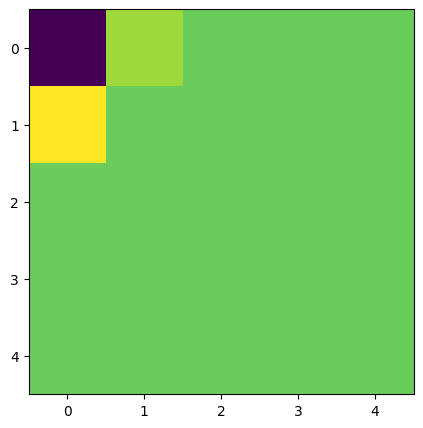

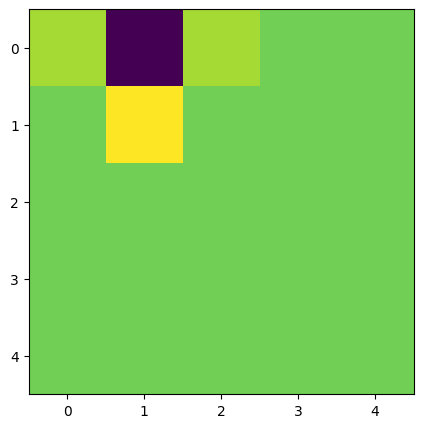

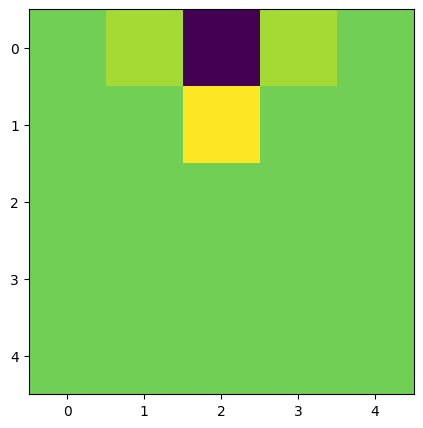

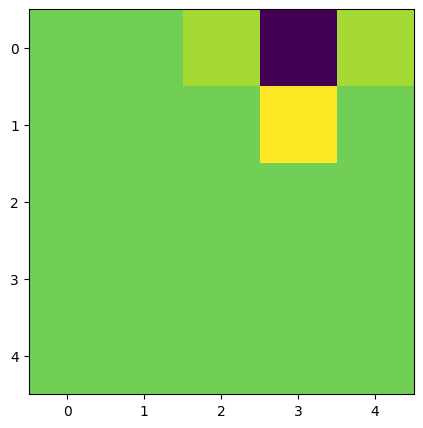

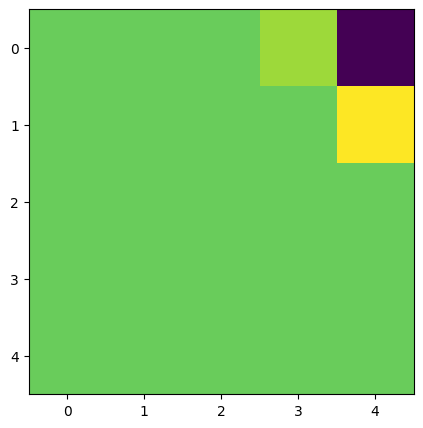

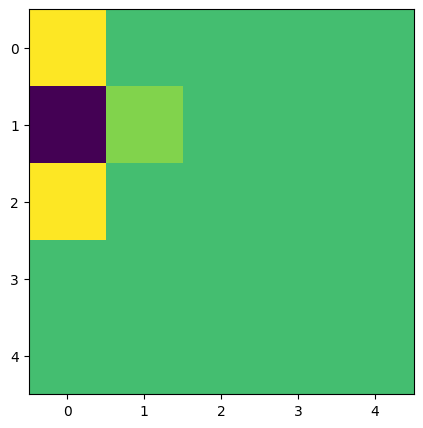

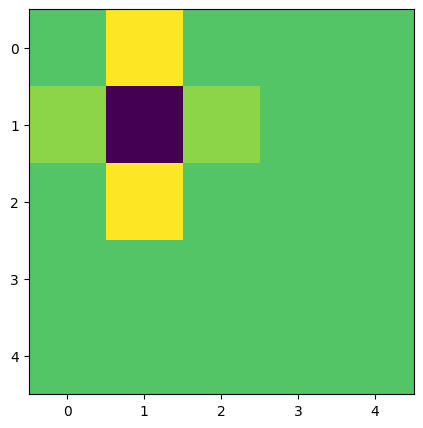

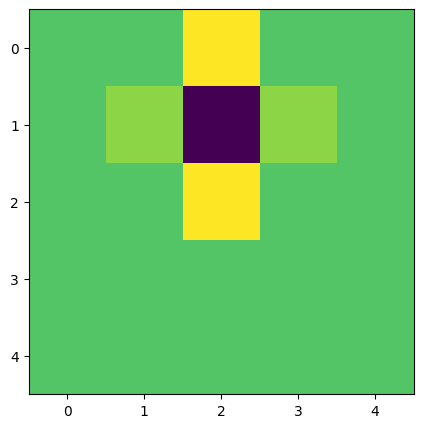

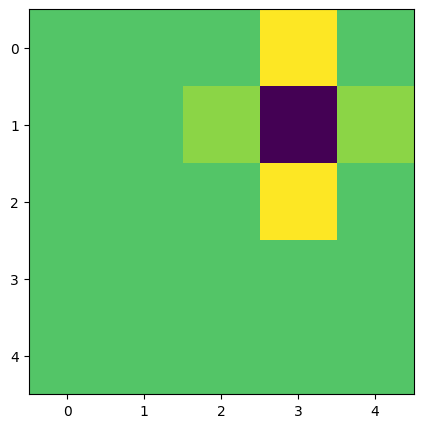

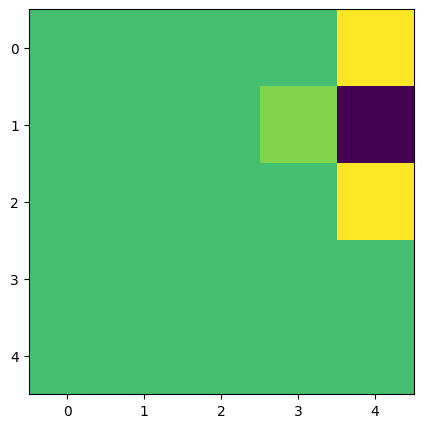

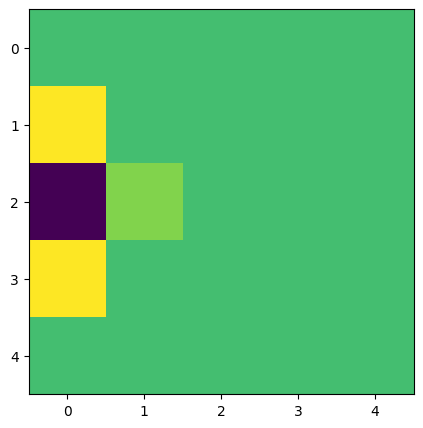

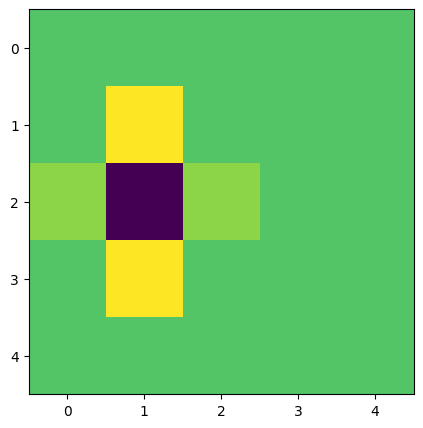

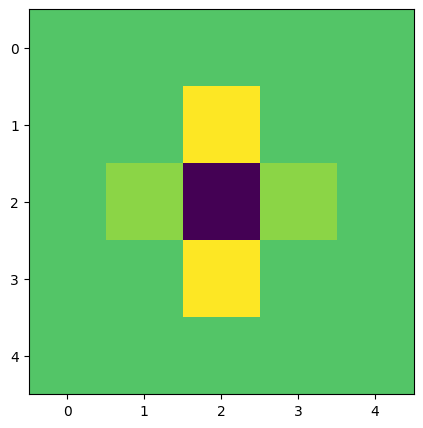

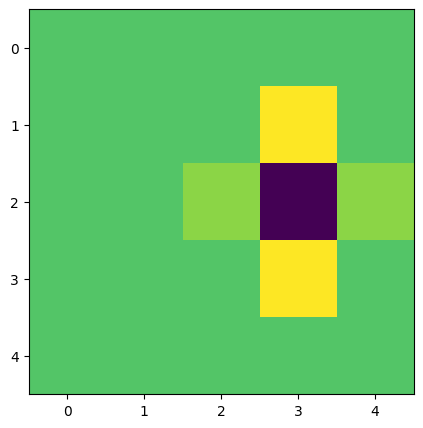

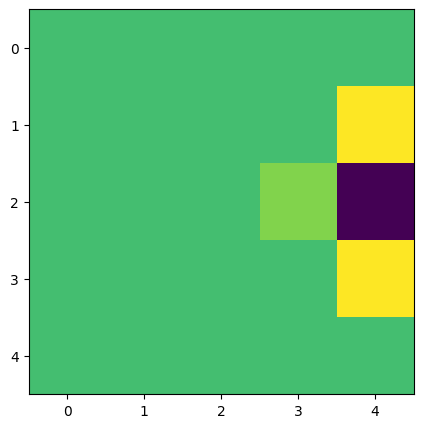

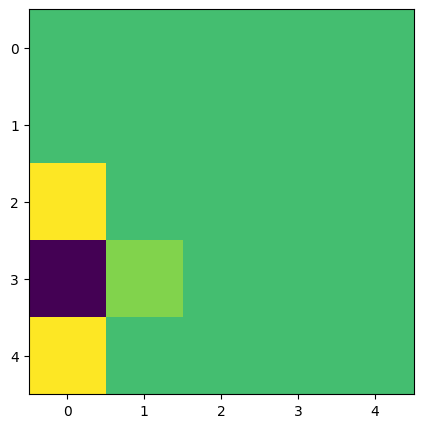

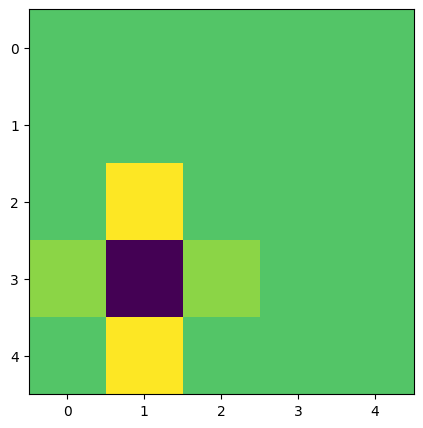

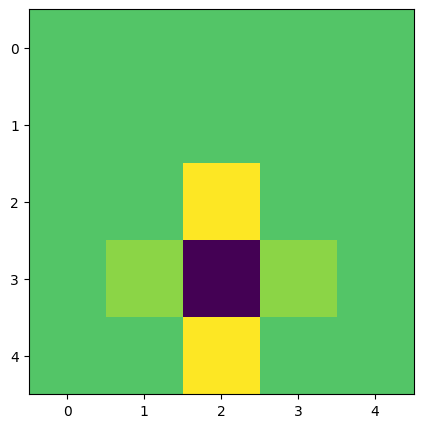

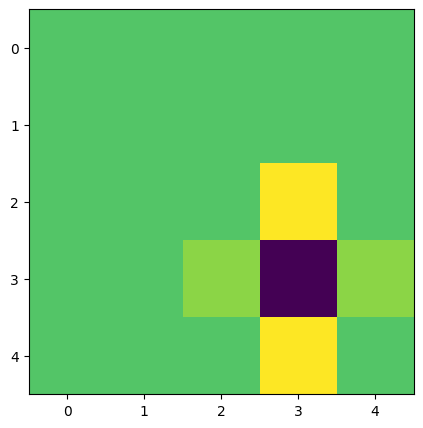

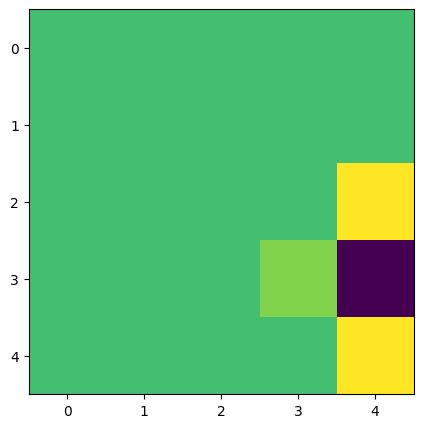

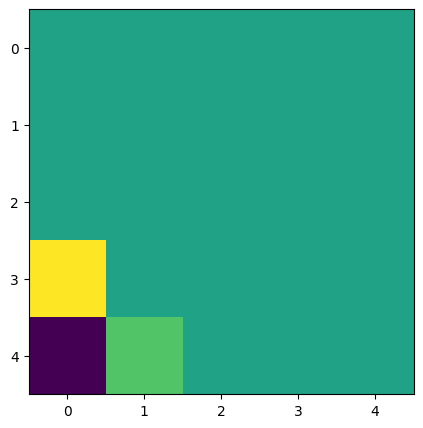

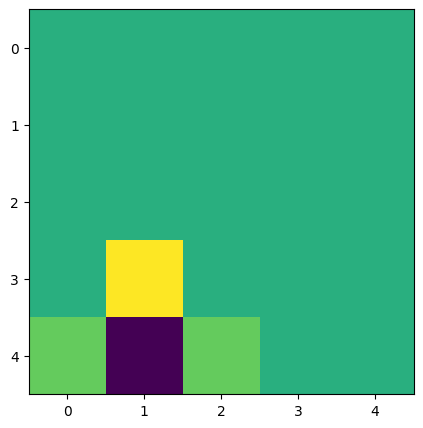

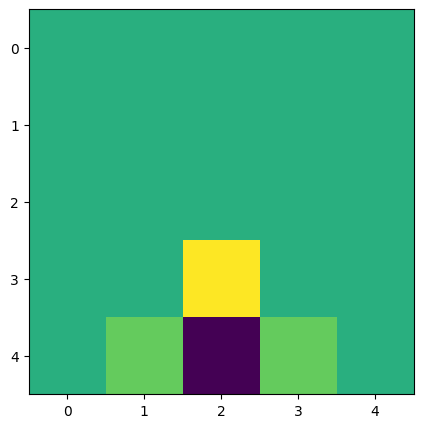

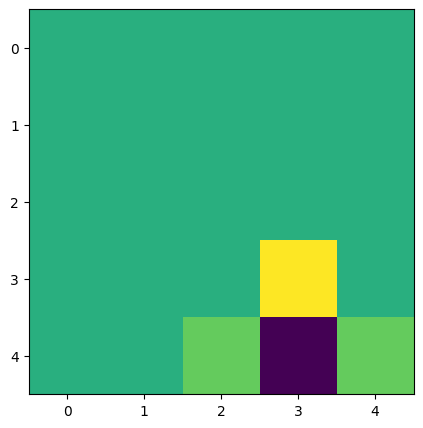

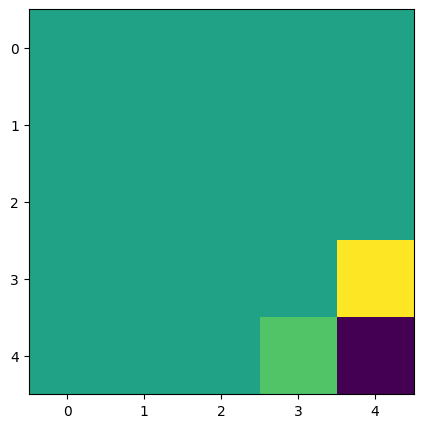

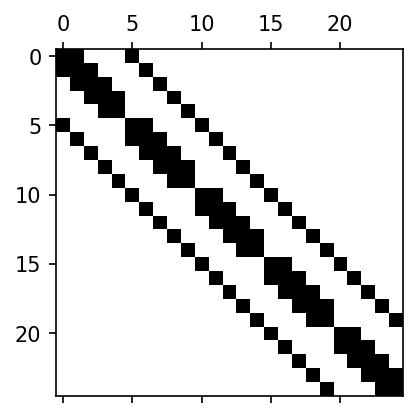

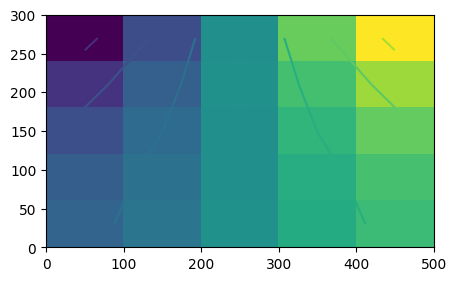

In [12]:
A = np.zeros((ngrid,ngrid))
b = np.zeros(ngrid)

row = 0
for i in range(nz):
    for j in range(nx):
        print('i = ', i, 'j = ', j)
        cond_grid = np.zeros((nz,nx))
        srcs = 0
        if i == 0:
            print('i=0')
            #When on top row - add source from top BC
            cdc = dx*dy*K/(dz/2)
            cond_grid[i,j] = cond_grid[i,j] - cdc
            srcs = srcs - top_head[j]*cdc
        else:
            print('i<>0')
            cdc = dx*dy*K/dz
            cond_grid[i,j] = cond_grid[i,j] - cdc
            cond_grid[i-1,j] = cond_grid[i-1,j] + cdc
        if i == (nz-1):
            print('i=(nz-1)')
            pass
            #When on bottom row - no sources from BC
        else:
            print('i<>(nz-1)')
            cdc = dx*dy*K/dz
            cond_grid[i,j] = cond_grid[i,j] - cdc
            cond_grid[i+1,j] = cond_grid[i+1,j] + cdc
        if j == 0:
            print('j=0')
            cond_grid = cond_grid
            #When at LHS - no sources from BC
        else:
            print('j<>0')
            cdc = dz*dy*K/dx
            cond_grid[i,j] = cond_grid[i,j] - cdc
            cond_grid[i,j-1] = cond_grid[i,j-1] + cdc
        if j == (nx-1):
            print('j=(nx-1)')
            pass
            #When at RHS - no sources from BC
        else:
            print('j<>(nx-1)')
            cdc = dz*dy*K/dx
            cond_grid[i,j] = cond_grid[i,j] - cdc
            cond_grid[i,j+1] = cond_grid[i,j+1] + cdc
        fig, axes = plt.subplots(1, 1, figsize=(5, 5))
        axes.imshow(cond_grid)
        cond_vec = np.reshape(cond_grid,(nx*nz))
        A[row,:] = cond_vec
        b[row] = srcs
        row = row + 1
        
#When creating a matrix by-hand, it is often good to be able to inspect it for errors.
fig = plt.figure(figsize=(3,3),dpi=150)
#You may use this to show all non-zero entries
plt.spy(A)

hvec = LA.solve(A,b)
Ahvec = A@hvec
resid = Ahvec - b
print(resid)

hmat = np.reshape(hvec,(nx,nz))
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.contour(xgc,zgc,hmat)
axes.pcolor(xgb,zgb,hmat)
axes.set_aspect('equal')
